Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [2]:
COLLABORATORS = "N/A"

---

In [3]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical  Quadrature 

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule (a 1-point quadrature rule like  Mid-point, but evaluated at $x=a$, not the mid-point)
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [4]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    # rectangle:
    # f(x_i) * delta x
    delta_x = b-a
    return f(a) * delta_x
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    # delta x * f(x_i + delta x / 2)
    delta_x = b-a
    return delta_x * f(a + delta_x/2.)
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    # delta x * [1/2 * f(x_i) + 1/2 * f(x_i+1)]
    delta_x = b-a
    return delta_x * (f(a)/2. + f(b)/2.)
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""
    # delta x * [1/6 * f(x_i) + 2/3 * f(x_i + delta x / 2) + 1/6 * f(x_i+1)]
    delta_x = b-a
    return delta_x * (f(a)/6. + 2*f(a+delta_x/2.)/3. + f(b)/6.)
    

In [5]:
x = 1.0
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)
I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)
print(I)

[1.1283791670955126 0.8787825789354448 0.7717433322580536
 0.843102830042981 ]


In [6]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

**gauss-legendre weight calculation:**

Given
$$
    P_3(x) = \frac{1}{2}(5x^3 -3x)
$$
with roots $x_i = 0, \pm\sqrt{\frac{3}{5}}$ and quadrature rule $I_3[f] = w_0 f(x_0) + w_1 f(x_1) + w_2 f(x_2)$

let's designate $x_0 = -\sqrt{\frac{3}{5}}, x_1 = 0$, and $x_2 = \sqrt{\frac{3}{5}}$

Then
$$\begin{aligned}
    &I[1] &=  \int^{1}_{-1} 1 dx = 2 & & I_3[1] &= w_0 + w_1 + w_2\\
    &I[x] &=  \int^{1}_{-1} x dx = 0 & & I_3[x] &= -w_0 \sqrt{\frac{3}{5}} + w_1(0) + w_2 \sqrt{\frac{3}{5}}\\
    &I[x^2] &=  \int^{1}_{-1} x^2 dx = \left.\frac{x^3}{3}\right|_{-1}^{1} = \frac{2}{3} & & I_3[x] &= -w_0 \frac{3}{5} + w_1(0) + w_2 \frac{3}{5}\\
\end{aligned}$$

or

$$
    \begin{bmatrix} 1 & 1 & 1\\ 
    -\sqrt{\frac{3}{5}} & 0 & \sqrt{\frac{3}{5}}\\ 
    -\frac{3}{5} & 0 & \frac{3}{5}\\ 
    \end{bmatrix}\begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix} =
    \begin{bmatrix} 2 \\ 0 \\ \frac{2}{3} \end{bmatrix} 
$$

From the second and third rows we get that:
$$
    w_0 = w_2 \\
    \frac{3}{5}w_0 + \frac{3}{5}w_0 = \frac{2}{3} \\
    \frac{6}{5}w_0 = \frac{2}{3} \\
    w_0 = w_2 = \frac{5}{9} \\
$$

Then from the first row we get:
$$
    w_1 = 2 - \frac{10}{9} = \frac{8}{9}
$$

Thus 
$
w_0 = w_2 = \frac{5}{9}$
and 
$
w_1 = \frac{8}{9}
$


Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [22]:
def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule for an arbitrary interval x \in [a,b]"""
    xGl = []
    wGl = []
    # 3 point Gauss-legendre quadrature
    xGl.append(numpy.array([-numpy.sqrt(3. /5.), 0., numpy.sqrt(3. / 5.)]))
    wGl.append(numpy.array([5., 8., 5.])/9.)
    
    # make affine map between x and xi
    xi_map = lambda xi: (b - a)/2. * xi + (a + b) / 2.
    
    I = (b - a)/2. * (wGl[0].dot(f(xi_map(xGl[0]))))
    return I

In [8]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [135]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type float)
    a: float
        left boundary of interval
    b: float
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    # use 1 point Newton-Cotes quadrature (Mid-point)
    # affine transformation using simpson's rule:
    
    '''
    xNC = []
    wNC = []
    xNC.append(numpy.array([0.]))
    wNC.append(numpy.array([2.]))
    
    I_N = 0
    delta_x = b-a
    xi_map = lambda xi: (b - a)/2. * xi + (a + b) / 2.
    
    for i in range(N):
        I = (b - a)/i * wNC[N-1].dot(f(xi_map(xNC[N-1])))
        I_N += I
    
    return I_N
    '''
    
    x = numpy.linspace(a, b, N+1)
    #print(x)
    I_N = 0
    for n in range(len(x)-1):
        I_N += method(f, x[n], x[n+1])
    #print(n)
    return I_N
        
    
    

In [136]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).


This function should  make a single, beautiful log-log plot with the following information

* plot the *relative error* for each quadrature rule with respect to 
$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$
for 
$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

* a legend that labels each curve with the name of the method

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


* the calculated rate of convergence of each  scheme. 

Note, if we define the convergence behavior of the error as
$$
    |e| = C\Delta x^p
$$

calculate $C$ and $p$ for each method and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend).  Add the best fit value of $p$ to the legend.  Hint 2: be careful not to include floating point issues in your fit. 

In [141]:
import math

def plot_quad_convergence(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    eps = numpy.finfo(float).eps
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    func_evals_per_panel = [1, 1, 2, 2, 3]
    # N will give you list of panel sizes
    error_methods = [numpy.zeros(len(N)) for m in methods]
    #print("error_methods is: ", error_methods)
    
    N = numpy.array(N)
    delta_x = (b - a)/N
    #print(f'delta_x is: {delta_x}')

    #print("delta_x is: ", delta_x)
    for i,method in enumerate(methods):
        threshold_reached = False
        for j,n in enumerate(N):
            I_quad = quadN(f, a, b, n, method)
            rel_err = numpy.abs(I_quad - I_true)/numpy.abs(I_true)
            error_methods[i][j] = rel_err
            if not threshold_reached and rel_err <= 10**(-7):
                threshold_reached = True
                print(f'number of function evaluations required to get rel err of approx 10^-7 for {method.__name__} is: \n\t{n * func_evals_per_panel[i]} \n\t number of panels is: {n}')
        if not threshold_reached:
            print(f'rel err of approx 10^-7 never reached for {method.__name__}')
            # need to hold on to this j value to figure out number of panels later on used for a particular method
            
    fig = plt.figure(figsize=(8,6))
    axes = fig.add_subplot(1,1,1)
    
    color_labels = [('ro','r--'), ('mo','m--'), ('yo','y--'), ('go','g--'), ('co','c--')]
    for k, method in enumerate(methods):
        error_vec_trunc = error_methods[k]
        delta_x_trunc = delta_x
        #print(f'{method.__name__} Method')
        for e,err in enumerate(error_methods[k]):
            if err < eps:
                error_vec_trunc = error_methods[k][:e]
                delta_x_trunc = delta_x[:e]
                #print(e)
                break
                #error_methods[k][e] = eps
        axes.loglog(delta_x, error_methods[k], color_labels[k][0], label=f'{method.__name__}')
        #print(f'error_methods[k] is: {error_methods[k]}')
        p, C = numpy.polyfit(numpy.log(delta_x_trunc), numpy.log(error_vec_trunc), 1)
        C = numpy.exp(C)
        #print(f'p is: {p}, C is: {C}')
        # linear fit, y = mx + c, polyfit returns m, c
        err_conv = C * delta_x**p
        #print(f'err_conv is: {err_conv}')
        if round(p) == 1: label = f'{round(p)}st order'
        else: label = f'{round(p)}nd order'
        #print(f'label is: {label}\n')
        axes.loglog(delta_x, err_conv, color_labels[k][1], label=label)

    axes.set_xlabel('$\Delta x$',fontsize=12)
    axes.set_ylabel('Relative Error')
    axes.set_title(title)
    axes.legend()
    axes.grid()

    plt.show()
    
    # print out coords of point for the first instance where the point's y coord (rel err) is less than 10^-7 
    # & also the number of panels N
    
    # the number of functon evaluations is the number of panels, N / delta x 
    # an increase in p refinement (increase in the order), better off with the order than with the number of panes

     # be on a loglog plot, plot the error 
    # plot rel rel error against delta x 
    # n * 2 is the total number of function evaluations
    # estimate n by looking at graph and seeing where it intersects
    # pass in list of methods
    # each method is gonna look over n, over some set of n, having delta x each time
    # for any given method, loglog plot of it should look like a straight line with a given slope that will depend on the method
    # make nice convergence plot, for each method have different slope
    # find best fit straight line and label 
    # choose error level and eyeball N level for where lines crossed, will tell you the panel
    

        #print("error_methods[i] is: ", error_methods[j])
         # quad_n extends quadrature rule over set of panels
        
        # one panel, delta x is b - a
        # two panels, delta x is (b - a) / 2
        # for each panel, evaluate function a different number of times 
        # as increase the number of panels, decrease delta x
        # each method has different number of function evaluations per panel
        # 3pointgl is 3 per panel, simpson is 2 per panel, trapezoid is 2 per panel, midpoint is 1 per panel
    #print("error_methods is: ", error_methods)
    

rel err of approx 10^-7 never reached for I_left
number of function evaluations required to get rel err of approx 10^-7 for I_midpoint is: 
	1024 
	 number of panels is: 1024
number of function evaluations required to get rel err of approx 10^-7 for I_trapezoid is: 
	2048 
	 number of panels is: 1024
number of function evaluations required to get rel err of approx 10^-7 for I_simpson is: 
	32 
	 number of panels is: 16
number of function evaluations required to get rel err of approx 10^-7 for I_GL3 is: 
	6 
	 number of panels is: 2


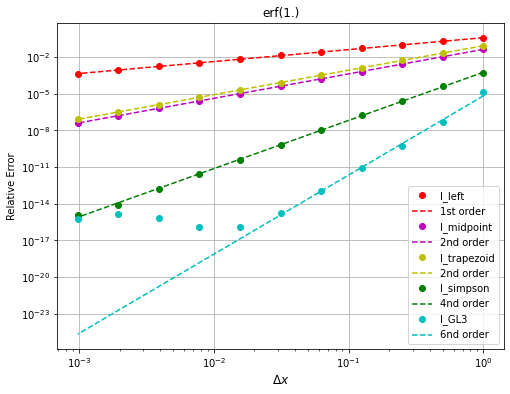

In [142]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of *function evaluations* required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


* Mid-point: number of panels is $1024$, number of function evaluations is: $1024$
* Simpson's: number of panels is $16$, number of function evaluations is: $32$
* 3-Pt GL quadrature: number of panels is $2$, number of function evaluations is: $6$

## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

The problematic point is at $x=0$ since $\frac{\cos x}{\sqrt{x}}$ and $\frac{\sin x}{\sqrt{x}}$ DNE (are undefined) at $x=0$.

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [98]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

rel err of approx 10^-7 never reached for I_left
rel err of approx 10^-7 never reached for I_midpoint
rel err of approx 10^-7 never reached for I_trapezoid
rel err of approx 10^-7 never reached for I_simpson
rel err of approx 10^-7 never reached for I_GL3


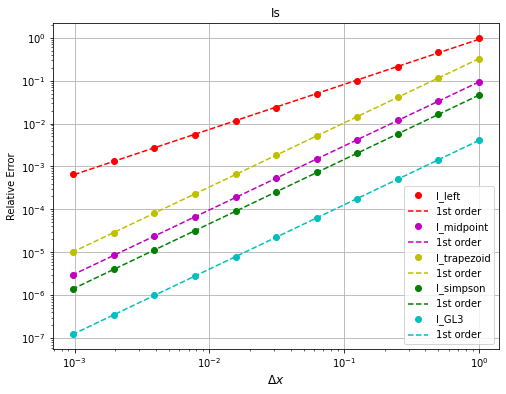

rel err of approx 10^-7 never reached for I_left
rel err of approx 10^-7 never reached for I_midpoint
rel err of approx 10^-7 never reached for I_trapezoid
rel err of approx 10^-7 never reached for I_simpson
rel err of approx 10^-7 never reached for I_GL3


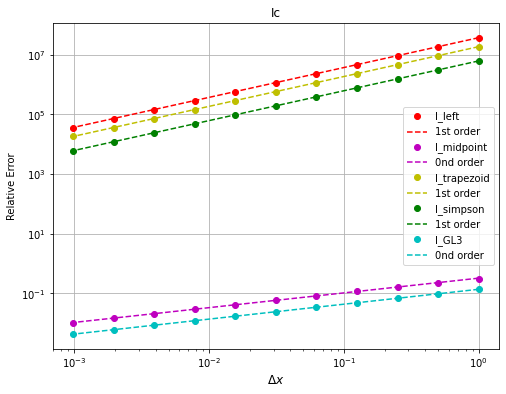

In [144]:
eps = numpy.finfo(float).eps # using machine epsilon instead of 0. for a as otherwise function is undefined at x=a=0.
#print(eps)
N = [ 2**n for n in range (11)]

f_s = lambda x : numpy.sin(x) / numpy.sqrt(x)
plot_quad_convergence(f_s, eps, 1., N, Is_true, 'Is')

f_c = lambda x : numpy.cos(x) / numpy.sqrt(x)
plot_quad_convergence(f_c, eps, 1., N, Ic_true, 'Ic')


# all you're changing is the function now in the plotting
# need to explain why, last piece is something to fix to way it was before 
 # an increase in p refinement (increase in the order), better off with the order than with the number of panes

**(c)**  [4] Explain the results of your plots

Because the functions are undefined at $x=0$, $a$ was fixed to be $\epsilon_{mach}$ so that the functions would have a value at the bottom end of the interval. However, as a result results of this integral approximation do not converge well, giving high relative error. Moreover, the # order's here are all low, and as we will see, we are better off with an increase in the refinement of p (increase in the order) than with the number of panes N.

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

For 
$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$
using substitution $x = t^2, dx = 2tdt$

we get
$$I_c = \int^1_0 \frac{\cos t^2}{t} 2t dt = \int^1_0 2\cos t^2 dt$$
and
$$I_s = \int^1_0 \frac{\sin t^2}{t} 2t dt = \int^1_0 2\sin t^2 dt$$

rel err of approx 10^-7 never reached for I_left
number of function evaluations required to get rel err of approx 10^-7 for I_midpoint is: 
	1024 
	 number of panels is: 1024
rel err of approx 10^-7 never reached for I_trapezoid
number of function evaluations required to get rel err of approx 10^-7 for I_simpson is: 
	8 
	 number of panels is: 4
number of function evaluations required to get rel err of approx 10^-7 for I_GL3 is: 
	12 
	 number of panels is: 4


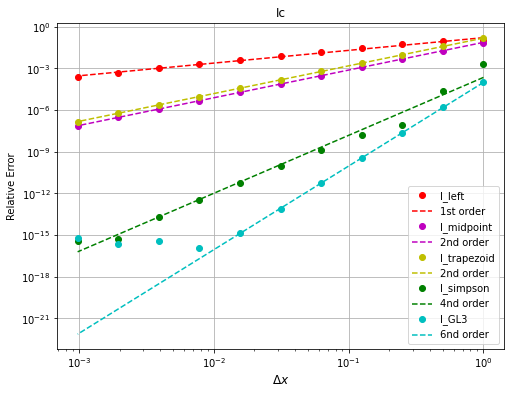

rel err of approx 10^-7 never reached for I_left
rel err of approx 10^-7 never reached for I_midpoint
rel err of approx 10^-7 never reached for I_trapezoid
number of function evaluations required to get rel err of approx 10^-7 for I_simpson is: 
	64 
	 number of panels is: 32
number of function evaluations required to get rel err of approx 10^-7 for I_GL3 is: 
	12 
	 number of panels is: 4


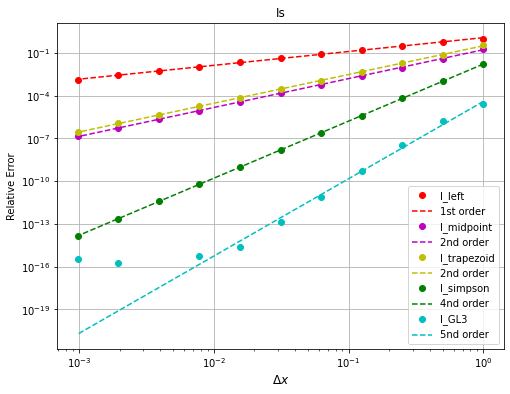

In [143]:
# last part of 2 that use function transformation to get reasonable looking thing
eps = numpy.finfo(float).eps

f_c_trans = lambda t : 2 * numpy.cos(t**2) 
plot_quad_convergence(f_c_trans, eps, 1., N, Ic_true, 'Ic')

f_s_trans = lambda t : 2 * numpy.sin(t**2)
plot_quad_convergence(f_s_trans, eps, 1., N, Is_true, 'Is')

By tranforming the variable $x$ with $x=t^2$, we are able to avoid the functions being undefined at $x=0$ and end up with integral results that have a better, lower relative error and convergence rate (in line with this, we see that the order #'s are higher than before the transformation, which implies that we are better off with an increase in the order p than with and increase in the number of panes N.